# Basic Operations on Images
Learn to:

Access pixel values and modify them（对像素的操作）

Access image properties（获得图像属性）

Set a Region of Interest (ROI)（设置感兴趣的区域）

Split and merge images（分割和融合图片）

本节操作可能更加偏向于Numpy而非OpenCV

## Accessing and Modifying pixel values（对像素的获取和调整）

In [8]:
import numpy as np
import cv2

img_color = cv2.imread("demo.png")
assert img_color is not None, "Image reading failed."  
# assert用来确保后面的语句返回True，若不为True则输出后面字符串
img_gray = cv2.imread("demo.png",cv2.IMREAD_GRAYSCALE)

# 索引某个像素，通过xy索引元素
px_1 = img_color[34,21] # 对三通道来说某个坐标的索引结果是array
px_2 = img_gray[34,21] # 对单通道来说某个坐标的索引结构是单个数值
print(px_1,px_2)

# 索引某个具体数值
px_ = img_color[34,21,0]
print(px_)

[116 140 149] 140
116


In [9]:
# 调整某个像素的具体数值
print(img_color[34,21])
img_color[34,21] = [255,255,255]
print(img_color[34,21])

[116 140 149]
[255 255 255]


In [10]:
# 对某个像素的单个通道进行调整
img_color[34,21,0] = 0
print(img_color[34,21])

[  0 255 255]


## Accessing Image Properties
Image properties include number of rows, columns, and channels; type of image data; number of pixels; etc.
图像属性包括：行数、列数、通道数；图像数据类型；像素个数。

In [15]:
# 返回行列和通道，返回元组
print("Color：",img_color.shape)
print("Gray: ",img_gray.shape)
# 返回像素总数
print("Color: ",img_color.size)
print("Gray: ",img_gray.size)
# 返回类型
print("Color: ",img_color.dtype)
print("Gray: ",img_gray.dtype)

Color： (144, 156, 3)
Gray:  (144, 156)
Color:  67392
Gray:  22464
Color:  uint8
Gray:  uint8


## Image ROI
Sometimes, you will have to play with certain regions of images. For eye detection in images, first face detection is done over the entire image. When a face is obtained, we select the face region alone and search for eyes inside it instead of searching the whole image. It improves accuracy (because eyes are always on faces :D ) and performance (because we search in a small area).

有时，您需要处理图像的某些区域。对于图像中的眼睛检测，首先在整个图像上进行人脸检测。当获得人脸后，我们仅选择人脸区域，并在其中搜索眼睛，而不是在整个图像中搜索。这提高了准确性（因为眼睛总是在脸上 :D）和性能（因为我们在较小的区域内搜索）。

In [20]:
Region_1 = img_color[10:60,10:60]
print(Region_1.shape)

img_color[70:120,70:120] = Region_1

cv2.imshow("window",img_color)
cv2.waitKey(0)

(50, 50, 3)


-1

## Splitting and Merging Image Channels
Sometimes you will need to work separately on the B,G,R channels of an image. In this case, you need to split the BGR image into single channels. In other cases, you may need to join these individual channels to create a BGR image.

有时您需要单独处理图像的 B、G、R 通道。在这种情况下，您需要将 BGR 图像分割成单个通道。在其他情况下，您可能需要将这些单独的通道合并以创建 BGR 图像。

1、需要将三通道分离开。cv2.spilt()
2、将三通道合并成一个通道。cv2.merge()

In [22]:
img_color.shape

(144, 156, 3)

In [28]:
# 将各个通道单独出来
b,g,r = cv2.split(img_color) # cv2.split()极耗费时间，如果不是必要不用。
b,g,r = img_color[:,:,0],img_color[:,:,1],img_color[:,:,2]
b.shape,g.shape,r.shape

((144, 156), (144, 156), (144, 156))

In [29]:
# 也可以将某个通道的数值进行处理
# 将blue通道值全赋值为0
img_color[:,:,0] = 0
cv2.imshow("window",img_color)
cv2.waitKey(0)

-1

## Making Borders for Images (Padding)
If you want to create a border around an image, something like a photo frame, you can use cv.copyMakeBorder(). But it has more applications for convolution operation, zero padding etc

如果您想在图像周围创建边框，类似于相框，可以使用 cv.copyMakeBorder()。但它在卷积操作、零填充等方面有更多应用。

->填充图像周围区域。

参数说明：
**src** - input image

**top, bottom, left, right** - border width in number of pixels in corresponding directions

**borderType** - Flag defining what kind of border to be added. It can be following types:
**cv.BORDER_CONSTANT** - Adds a constant colored border. The value should be given as next argument.
**cv.BORDER_REFLECT** - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
**cv.BORDER_REFLECT_101 or cv.BORDER_DEFAULT** - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
**cv.BORDER_REPLICATE** - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
**cv.BORDER_WRAP** - Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg

**value** - Color of border if border type is cv.BORDER_CONSTANT

解释：

**src** - 输入图像

**top, bottom, left, right** - 对应方向上需要扩充的像素的个数

**borderType** - 填充的类型，有以下类型:
**cv.BORDER_CONSTANT** - 使用常量值，用此方法需要在下一个参数中传入值.
**cv.BORDER_REFLECT** - 镜像反射方法。fedcba|abcdefgh|hgfedcb
**cv.BORDER_REFLECT_101 or cv.BORDER_DEFAULT** - 另一种类型的镜像关系。gfedcb|abcdefgh|gfedcba
**cv.BORDER_REPLICATE** - 用最边缘元素进行复制。aaaaaa|abcdefgh|hhhhhhh
**cv.BORDER_WRAP** - 形如: cdefgh|abcdefgh|abcdefg

**value** - 如果类型是 cv.BORDER_CONSTANT 设置的颜色值。

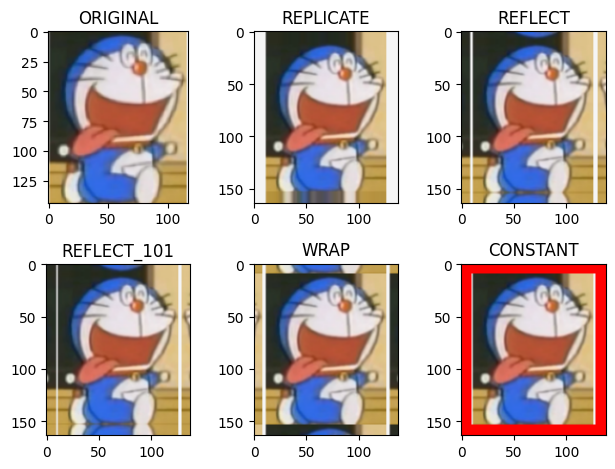

In [32]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
BLUE = [255,0,0]
 
img1 = cv.imread('demo2.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)  # 默认通道时bgr，转化为rgb
assert img1 is not None, "file could not be read, check with os.path.exists()"
 
replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)
 
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.tight_layout()
plt.show()